# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
mean_house_unit_py = sfo_data["housing_units"].groupby("year").mean()
mean_house_unit_py

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [5]:
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

In [6]:
# Save the dataframe as a csv file

file_path_write = Path("Data/sfo_neighborhoods_mean_house_unit_py.csv")
mean_house_unit_py.to_csv(file_path_write)


(370560, 386242)

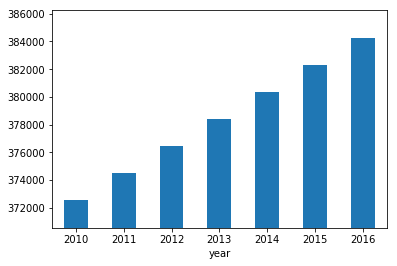

In [7]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

ax = mean_house_unit_py.plot.bar(x='Year', y='Housing Units', rot=0)

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
ymin = sfo_data["housing_units"].min() - 2000
ymax = sfo_data["housing_units"].max() + 2000
ax.set_ylim(ymin,ymax)

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [13]:
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

In [9]:
# Calculate the average sale price per square foot and average gross rent
sfo_average = sfo_data.groupby("year").mean()
sfo_average = sfo_average.drop(['housing_units'], axis=1)
sfo_average

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

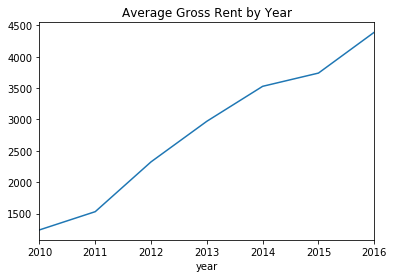

In [10]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
bx = sfo_average["gross_rent"].plot(x = "Year", y = "gross_rent", title= "Average Gross Rent by Year", rot=0)
bx


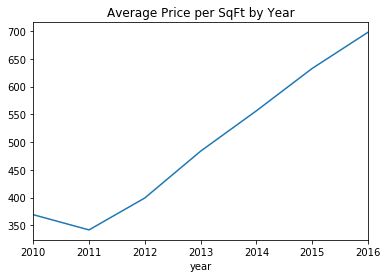

In [11]:
# Line chart for average montly rent
cx = sfo_average["sale_price_sqr_foot"].plot(x = "Year", y = "Price per Square Foot", title= "Average Price per SqFt by Year", rot=0)
cx

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [42]:
sfo_data_sum = sfo_data.groupby(["year","neighborhood"]).sum()
sfo_data_sum.head()


sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [44]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# sfo_data_sum.rename(columns={'sale_price_sqr_foot':'Avg. Price per Square Foot' , 'gross_rent' : 'Avg. Gross Rent per Year'})

Avg. Price per Square Foot  housing_units  \
year neighborhood                                                               
2010 Alamo Square                                   291.182945         372560   
     Anza Vista                                     267.932583         372560   
     Bayview                                        170.098665         372560   
     Buena Vista Park                               347.394919         372560   
     Central Richmond                               319.027623         372560   
     Central Sunset                                 418.172493         372560   
     Corona Heights                                 369.359338         372560   
     Cow Hollow                                     569.379968         372560   
     Croker Amazon                                  165.645730         372560   
     Diamond Heights                                456.930822         372560   
     Downtown                                       241.804552         372560   
     Eureka Valley/Dolores Heights                  403.118313         372560   
     Excelsior                                      364.928336         372560   
     Financial District North                       401.749967         372560   
     Financial District South                       162.821210         372560   
     Forest Knolls                                  209.049327         372560   
     Glen Park                                      715.586438         372560   
     Golden Gate Heights                            551.801119         372560   
     Haight Ashbury                                 254.473779         372560   
     Hayes Valley                                   272.284980         372560   
     Hunters Point                                  170.624920         372560   
     Ingleside                                      275.056686         372560   
     Inner Mission                                  238.350020         372560   
     Inner Parkside                                 199.702004         372560   
     Inner Richmond                                 285.822358         372560   
     Inner Sunset                                   275.769730         372560   
     Jordan Park/Laurel Heights                     419.887812         372560   
     Lake --The Presidio                            320.796910         372560   
     Lone Mountain                                  398.458876         372560   
     Lower Pacific Heights                          374.057636         372560   
...                                                        ...            ...   
2016 Inner Mission                                  647.770447         384242   
     Inner Parkside                                 518.112650         384242   
     Inner Richmond                                 403.311132         384242   
     Inner Sunset                                   445.923828         384242   
     Jordan Park/Laurel Heights                     704.566419         384242   
     Lower Pacific Heights                          636.430770         384242   
     Marina                                         431.944602         384242   
     Merced Heights                                1416.666667         384242   
     Mission Bay                                    924.569116         384242   
     Mission Terrace                                879.017013         384242   
     Nob Hill                                       777.008315         384242   
     Noe Valley                                     799.495651         384242   
     North Beach                                    407.553322         384242   
     Outer Mission                                   40.772625         384242   
     Outer Parkside                                 732.720684         384242   
     Outer Richmond                                1196.645437         384242   
     Outer Sunset                                   510.576907     

In [95]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# test.hvplot( groupby='neighborhood',  y='sale_price_sqr_foot', group_label='Avg. Price per Square Foot')

sfo_data_sum.hvplot( groupby='neighborhood', y='sale_price_sqr_foot').opts(line_color='red')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [94]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
# test.hvplot( groupby='neighborhood',  y='gross_rent', group_label='Avg. Gross Rent per Year', value_label='Rate (per 100k)')

sfo_data_sum.hvplot( groupby='neighborhood', y='gross_rent').opts(line_color='green')

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

In [68]:
# test= sfo_data.groupby("neighbourhood")
mean_house_unit_py = sfo_data.groupby('neighborhood').mean()
test = mean_house_unit_py.sort_values('sale_price_sqr_foot', ascending=False)
test2 = test[0:9]
test2

sale_price_sqr_foot  housing_units   gross_rent
neighborhood                                                          
Union Square District           903.993258      377427.50  2555.166667
Merced Heights                  788.844818      380348.00  3414.000000
Miraloma Park                   779.810842      375967.25  2155.250000
Pacific Heights                 689.555817      378401.00  2817.285714
Westwood Park                   687.087575      382295.00  3959.000000
Telegraph Hill                  676.506578      378401.00  2817.285714
Presidio Heights                675.350212      378401.00  2817.285714
Cow Hollow                      665.964042      378401.00  2817.285714
Potrero Hill                    662.013613      378401.00  2817.285714

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [12]:
# Getting the data from the top 10 expensive neighborhoods to own
# YOUR CODE HERE!

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0  Union Square District           903.993258      377427.50  2555.166667
1         Merced Heights           788.844818      380348.00  3414.000000
2          Miraloma Park           779.810842      375967.25  2155.250000
3        Pacific Heights           689.555817      378401.00  2817.285714
4          Westwood Park           687.087575      382295.00  3959.000000
5         Telegraph Hill           676.506578      378401.00  2817.285714
6       Presidio Heights           675.350212      378401.00  2817.285714
7             Cow Hollow           665.964042      378401.00  2817.285714
8           Potrero Hill           662.013613      378401.00  2817.285714
9            South Beach           650.124479      375805.00  2099.000000

In [72]:
# Plotting the data from the top 10 expensive neighborhoods
test2.hvplot.bar(y='sale_price_sqr_foot', rot=90, title ='test')

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [124]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sfo_data.head()
sfo_data1 = sfo_data
del sfo_data1['housing_units']
sfo_data1

neighborhood  sale_price_sqr_foot  gross_rent
year                                                                
2010                   Alamo Square           291.182945        1239
2010                     Anza Vista           267.932583        1239
2010                        Bayview           170.098665        1239
2010               Buena Vista Park           347.394919        1239
2010               Central Richmond           319.027623        1239
2010                 Central Sunset           418.172493        1239
2010                 Corona Heights           369.359338        1239
2010                     Cow Hollow           569.379968        1239
2010                  Croker Amazon           165.645730        1239
2010                Diamond Heights           456.930822        1239
2010                      Downtown            241.804552        1239
2010  Eureka Valley/Dolores Heights           403.118313        1239
2010                      Excelsior           364.928336        1239
2010       Financial District North           401.749967        1239
2010       Financial District South           162.821210        1239
2010                  Forest Knolls           209.049327        1239
2010                      Glen Park           715.586438        1239
2010            Golden Gate Heights           551.801119        1239
2010                 Haight Ashbury           254.473779        1239
2010                   Hayes Valley           272.284980        1239
2010                  Hunters Point           170.624920        1239
2010                     Ingleside            275.056686        1239
2010                  Inner Mission           238.350020        1239
2010                 Inner Parkside           199.702004        1239
2010                 Inner Richmond           285.822358        1239
2010                   Inner Sunset           275.769730        1239
2010     Jordan Park/Laurel Heights           419.887812        1239
2010            Lake --The Presidio           320.796910        1239
2010                  Lone Mountain           398.458876        1239
2010          Lower Pacific Heights           374.057636        1239
...                             ...                  ...         ...
2016                  Inner Mission           647.770447        4390
2016                 Inner Parkside           518.112650        4390
2016                 Inner Richmond           403.311132        4390
2016                   Inner Sunset           445.923828        4390
2016     Jordan Park/Laurel Heights           704.566419        4390
2016          Lower Pacific Heights           636.430770        4390
2016                         Marina           431.944602        4390
2016                 Merced Heights          1416.666667        4390
2016                    Mission Bay           924.569116        4390
2016                Mission Terrace           879.017013        4390
2016                       Nob Hill           777.008315        4390
2016                     Noe Valley           799.495651        4390
2016                    North Beach           407.553322        4390
2016                  Outer Mission            40.772625        4390
2016                 Outer Parkside           732.720684        4390
2016                Outer Richmond           1196.645437        4390
2016                   Outer Sunset           510.576907        4390
2016                Pacific Heights           996.389364        4390
2016                     Park North           211.301370        4390
2016      Parnassus/Ashbury Heights          1207.997485        4390
2016                   Potrero Hill           707.651609        4390
2016               Presidio Heights          1465.968586        4390
2016                   Russian Hill          1024.339877        4390
2016                South of Market           531.136374        4390
2016                      Sunnyside           751.173709        4390
2016                 

In [125]:
# Plotting the data from the top 10 expensive neighborhoods
sfo_data1 = sfo_data

#sfo_sort2 = sfo_sort1.sort_values(['year','neighborhood'], ascending=[True, False])

# ax_price_sqare_foot =sfo_data1.hvplot.bar( groupby=('neighborhood'), x='sale_price_sqr_foot', y='housing_units', rot=90).opts(
#     title="Top 10 Expensive Neighbourhoods in SFO")
# ax_gross_rent = sfo_data1.hvplot.bar( groupby='neighborhood', x='gross_rent', y='housing_units', rot=90)
# ax_gross_year = sfo_data1.hvplot.bar ( groupby='neighborhood', x='year', y='housing_units')
#ax_price_sqare_foot * ax_gross_rent * ax_gross_year
#ax_price_sqare_foot

ax_gross_year = sfo_data1.hvplot.bar(groupby=('neighborhood'), rot=90).opts(
    title="Neighbourhoods in SFO")
ax_gross_year

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [130]:
# Load neighborhoods coordinates data
file_path2 = Path("Data/neighborhoods_coordinates.csv")
sfo_neighborhoods = pd.read_csv(file_path2).drop_duplicates()
sfo_neighborhoods.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

In [135]:
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

sfo_average = sfo_data.groupby("neighborhood").mean()
sfo_average.head()

sale_price_sqr_foot  housing_units   gross_rent
neighborhood                                                    
Alamo Square              366.020712       378401.0  2817.285714
Anza Vista                373.382198       379050.0  3031.833333
Bayview                   204.588623       376454.0  2318.400000
Bayview Heights           590.792839       382295.0  3739.000000
Bernal Heights            576.746488       379374.5  3080.333333

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [17]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

Neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0     Alamo Square           366.020712       378401.0  2817.285714
1       Anza Vista           373.382198       379050.0  3031.833333
2          Bayview           204.588623       376454.0  2318.400000
3  Bayview Heights           590.792839       382295.0  3739.000000
4  Bernal Heights            576.746488       379374.5  3080.333333

In [143]:
sfo_neighborhoods_index = sfo_neighborhoods.set_index("Neighborhood")
#sfo_average_index = sfo_average.set_index("Neighborhood").reset


In [151]:
sfo_combined = pd.concat([sfo_neighborhoods_index , sfo_average], axis=1, sort=True).dropna().reset_index()
sfo_combined

index        Lat         Lon  sale_price_sqr_foot  \
0                    Alamo Square  37.791012 -122.402100           366.020712   
1                      Anza Vista  37.779598 -122.443451           373.382198   
2                         Bayview  37.734670 -122.401060           204.588623   
3                 Bayview Heights  37.728740 -122.410980           590.792839   
4                Buena Vista Park  37.768160 -122.439330           452.680591   
5                Central Richmond  37.777890 -122.445170           394.422399   
6                  Central Sunset  37.749610 -122.489990           423.687928   
7               Clarendon Heights  37.753310 -122.447030           487.244886   
8                  Corona Heights  37.785530 -122.456000           587.539067   
9                      Cow Hollow  37.792980 -122.435790           665.964042   
10                  Croker Amazon  37.722800 -122.438690           303.004184   
11                Diamond Heights  37.728630 -122.443050           434.991739   
12                Duboce Triangle  37.769640 -122.426110           502.599156   
13  Eureka Valley/Dolores Heights  37.755540 -122.437790           642.248671   
14                      Excelsior  37.728740 -122.410980           388.765927   
15       Financial District North  37.791010 -122.402100           391.362533   
16       Financial District South  37.791010 -122.402100           455.836212   
17                  Forest Knolls  37.757060 -122.455090           321.840837   
18                      Glen Park  37.728630 -122.443050           623.826178   
19            Golden Gate Heights  37.757912 -122.464020           639.393557   
20                 Haight Ashbury  37.765250 -122.435960           449.544762   
21                   Hayes Valley  37.765250 -122.435960           355.932828   
22                  Hunters Point  37.725510 -122.371780           170.624920   
23              Ingleside Heights  37.721160 -122.487070           384.797928   
24                  Inner Mission  37.754160 -122.419470           397.673715   
25                 Inner Parkside  37.749610 -122.489990           519.385604   
26                 Inner Richmond  37.769112 -122.483566           378.594314   
27                   Inner Sunset  37.749610 -122.489970           413.667515   
28     Jordan Park/Laurel Heights  37.785530 -122.456000           529.384185   
29            Lake --The Presidio  37.801520 -122.454570           409.954352   
..                            ...        ...         ...                  ...   
39                       Nob Hill  37.792980 -122.435790           458.204094   
40                     Noe Valley  37.753310 -122.447030           542.442913   
41                    North Beach  37.800550 -122.404330           411.646876   
42               North Waterfront  37.800550 -122.404330           498.269755   
43                      Oceanview  37.719930 -122.465950           330.097385   
44                  Outer Mission  37.722800 -122.438690           242.370952   
45                 Outer Parkside  37.751700 -122.446000           485.027013   
46                   Outer Sunset  37.749610 -122.489990           394.219032   
47                Pacific Heights  37.792980 -122.435790           689.555817   
48                     Park North  37.728380 -122.478510           373.732856   
49                       Parkside  37.749610 -122.489990           336.172661   
50      Parnassus/Ashbury Heights  37.763550 -122.457650           632.740454   
51                        Portola  37.734670 -122.401060           327.113925   
52                   Potrero Hill  37.731960 -122.383240           662.013613   
53               Presidio Heights  37.785530 -122.456000           675.350212   
54                   Russian Hill  37.792980 -122.435790           608.983217   
55                 Silver Terrace  37.734670 -122.401060           170.292549   
56                    South Beach  37.783230 -122.400650   

In [18]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!

Neighborhood        Lat         Lon  sale_price_sqr_foot  \
0      Alamo Square  37.791012 -122.402100           366.020712   
1        Anza Vista  37.779598 -122.443451           373.382198   
2           Bayview  37.734670 -122.401060           204.588623   
3   Bayview Heights  37.728740 -122.410980           590.792839   
4  Buena Vista Park  37.768160 -122.439330           452.680591   

   housing_units   gross_rent  
0       378401.0  2817.285714  
1       379050.0  3031.833333  
2       376454.0  2318.400000  
3       382295.0  3739.000000  
4       378076.5  2698.833333

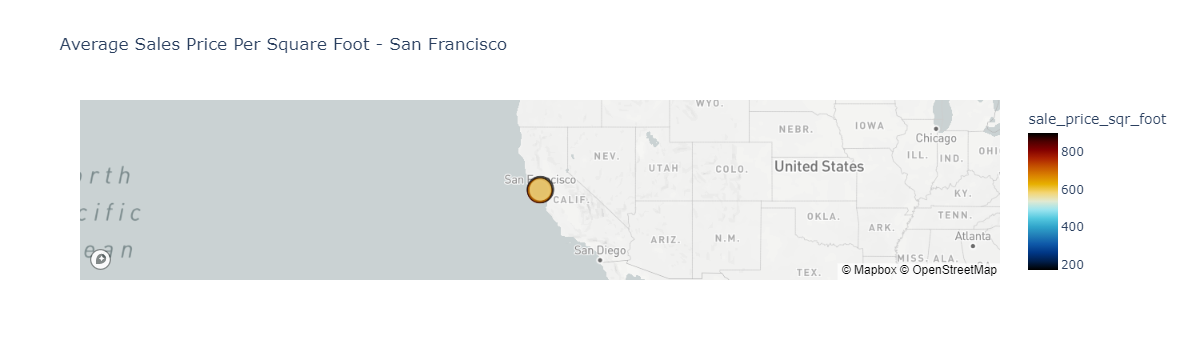

In [163]:
# Set the mapbox access token
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")
# Set token using Plotly Express set function
px.set_mapbox_access_token(map_box_api)


# Create plots
sfo_plot = px.scatter_mapbox(
   sfo_combined,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.cyclical.IceFire,
    title="Average Sales Price Per Square Foot - San Francisco",
    zoom=3,
    width=1000,
    hover_data=sfo_combined,
)

sfo_plot

# # Create plots
# sfo_plot2 = px.scatter_mapbox(
#    sfo_combined,
#     lat="Lat",
#     lon="Lon",
#     size="sale_price_sqr_foot",
#     color="sale_price_sqr_foot",
#     color_continuous_scale=px.colors.cyclical.IceFire,
#     title="Average Sales Price Per Square Foot - San Francisco",
#     zoom=3,
#     width=1000,
# )

# sfo_plot2

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

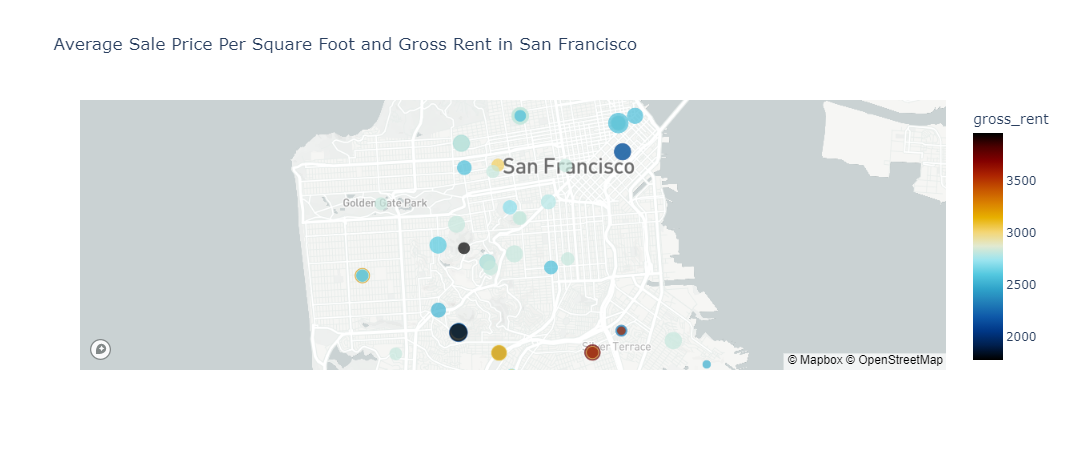

In [19]:

# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [20]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
7   2010        Cow Hollow           569.379968         372560        1239
31  2010     Miraloma Park           680.608729         372560        1239
41  2010   Pacific Heights           496.516014         372560        1239
46  2010      Potrero Hill           491.450004         372560        1239
47  2010  Presidio Heights           549.417931         372560        1239

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


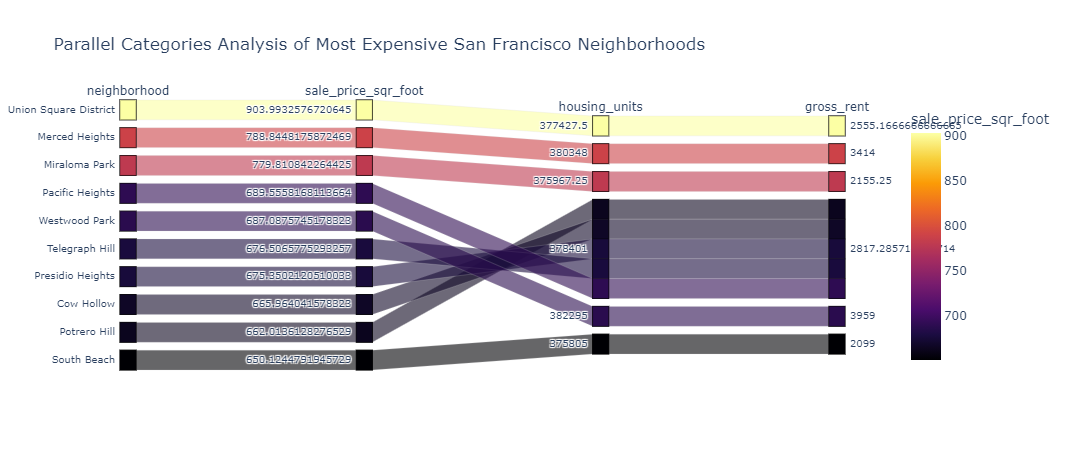

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

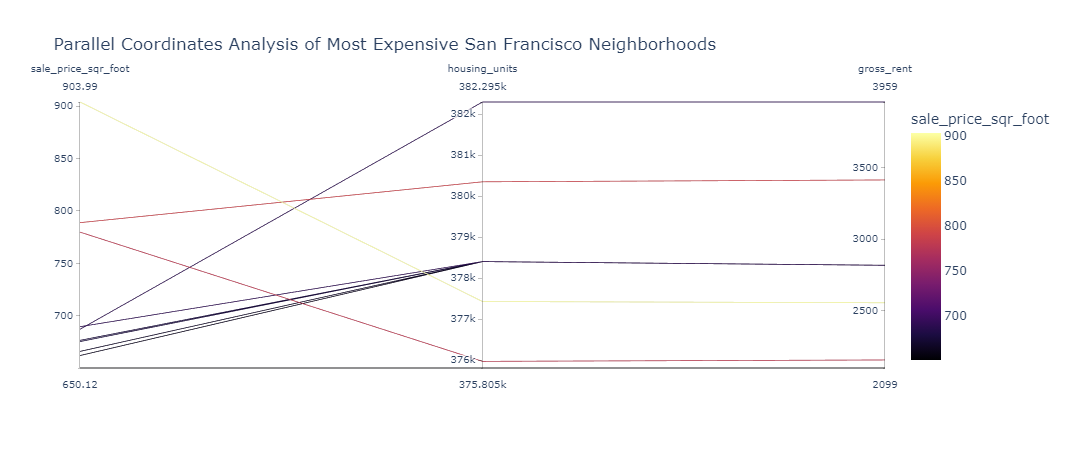

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

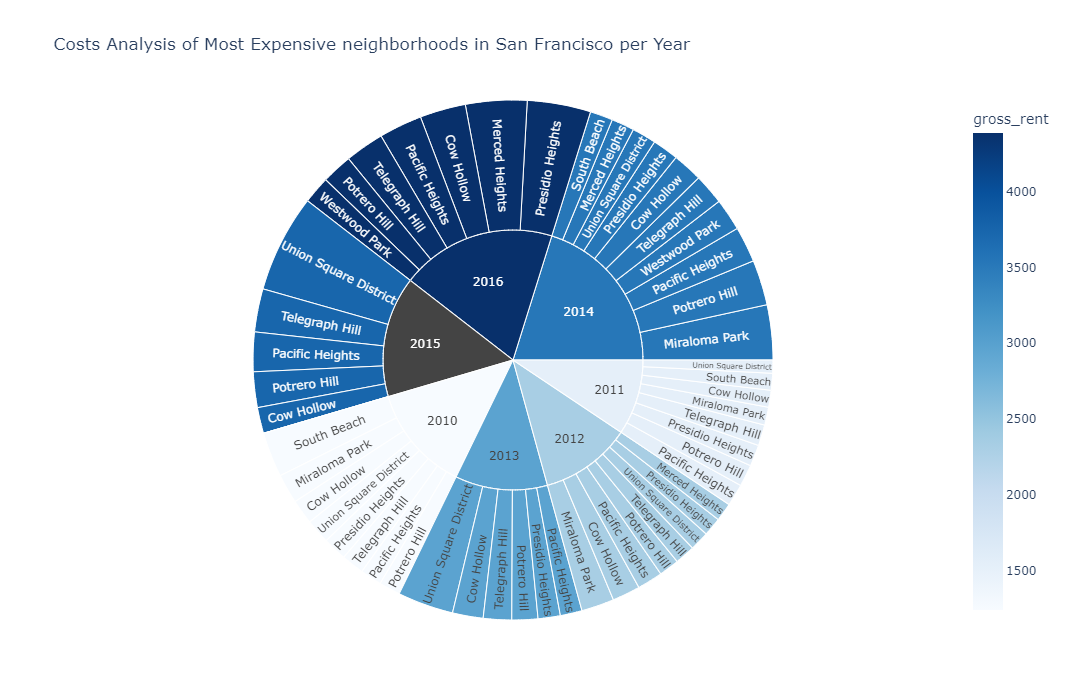

In [23]:
# Sunburst Plot
# YOUR CODE HERE!